# Test Functions for Optimisation in n Dimensions
This is a small test suite for optimisation algorithms that work on n-dimensional problems. I have developing machine learning assisted design of experiments for setting optimisation on industrial manufacturing equipment. To test the algorithms and gauge the limits of the approach, I wanted to apply them to simulated problems.
## Function Properties
The functions included in this suite generally satisfy the following properties.<br>
The function f, maps an n-dimensional hypercybe to a real number

<div align="center">
	<img width="300" src="images/function_definition.png" alt="f: x e [a,b]^n -> y e R">
</div>

The function is continuous in the hypercube, it is difficult to approximate, and possibly have multiple treacherous local extrema. The function may have several global extrema, but assume minimisation problems and will not have global minima on the edges of the hypercube.

## Sampling for Simulation
In general terms, the problems assume a function that maps a normalised range of n number of parameters to a real number, the target variable. So, a model of the system tries to approximate a function f

<div align="center">
	<img width="300" src="images/function_definition_unitcube.png" alt="f: x e [0,1]^n -> y e R">
</div>

And our eventual target is to find the x that minimises y.<br>
An added challenge when sampling for the real system is noise. Sampling the target variable at the same settings multiple times will yield different values. We can, however, reasonably assume gaussian noise, such that the average of multiple samples will tend towards the true value. For problems that sample computer models (e.g. a finite element model) this is not an issue and the same set of parameters will always yield the same output value. This aspect has been implemented as gaussian noise that can be switched on and off depeinding on the problem at hand.

# Using the Functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

Import your favourite function from the catalogue

In [2]:
from opt_test_functions import Rastrigin, Michalewicz

Before using the function, indicate whether you want to return the function with noise and what the full range of the input variables are. In this case we will tell it to expect input values in the range -2 to 2 and report the function with noise that has a standard deviation of 2.

In [3]:
myTestFunction = Rastrigin(noise=True, noise_stddev=5, xmin=-2, xmax=2)

Now all we need to do is pass the function one or more sets of parameters. The function will match the number of dimensions and the batch size, i.e. the number of sets. The input is a numpy array of any dimensions. The first dimension represents the dimensionality, n, of the function. Any dimensions after the first are considered a batch and will be matched in the output. E.g. an array of size (4, 5, 6) represents a n=4 version of the function and the output will be of size (5, 6)

In [4]:
x = np.random.random((4, 5, 6))*4 - 2 # 4 dimensions 5x6 examples
print("x shape: ", x.shape)
y = myTestFunction(x)
print("y shape: ", y.shape)

x shape:  (4, 5, 6)
y shape:  (5, 6)


Choosing the right amount of noise for your case might take a little trial and error

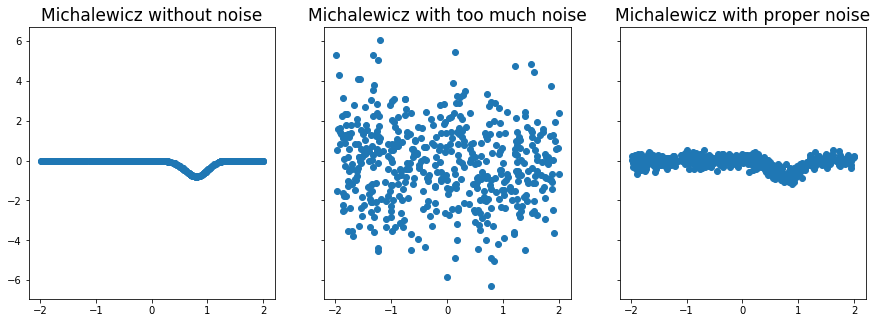

In [14]:
x = np.random.random((1, 500))*4 - 2 # 1 dimension, 5 examples

myTestFunction = Michalewicz(noise=False, xmin=-2, xmax=2)
y1 = myTestFunction(x)

myTestFunction.config(noise=True, noise_stddev=2)
y2 = myTestFunction(x)

myTestFunction.config(noise_stddev=0.2)
y3 = myTestFunction(x)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,5))
ax1.scatter(x, y1)
ax1.set_title("Michalewicz without noise", fontsize=17)
ax2.scatter(x, y2)
ax2.set_title("Michalewicz with too much noise", fontsize=17)
ax3.scatter(x, y3)
ax3.set_title("Michalewicz with proper noise", fontsize=17)
plt.show()

# Implemented Functions
Here are the currently implemented functions and how they look in n=2.

## Michalewicz
The Michalewicz function is usually evaluated in the range 0 to pi. The exact placement of the global minimum depends on the dimensionality of the input.
<div align="center">
	<img width="300" src="images/michalewicz_function.png" alt="Rastrigin Function">
</div>
Here, m = 10.

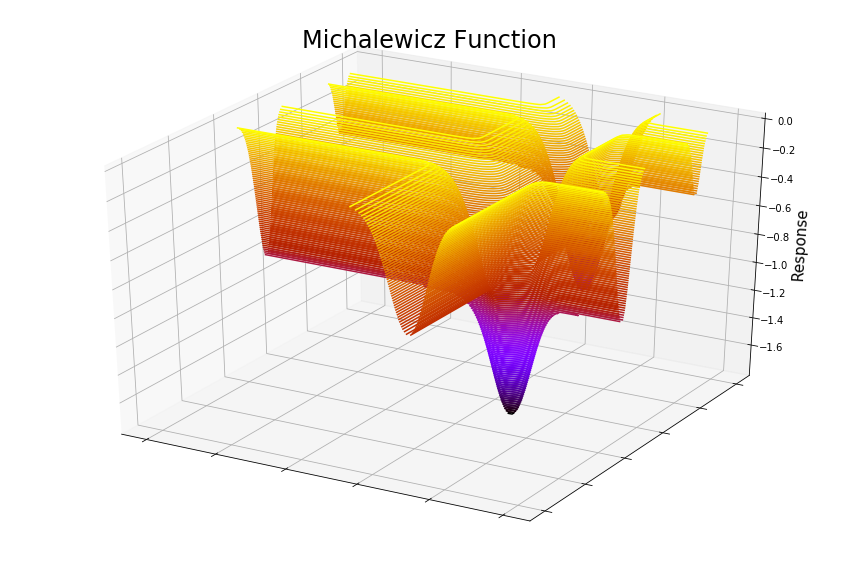

In [6]:
from opt_test_functions import Rastrigin

myTestFunction = Michalewicz()
linsp = np.linspace(0, 1, 100)
x = np.stack(np.meshgrid(linsp, linsp),axis=0)
y = myTestFunction(x)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.contour3D(x[0,:,:], x[1,:,:], y, 150, cmap='gnuplot')
ax.set_zlabel('Response', fontsize=15)
ax.set_title("Michalewicz Function", fontsize=24)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

## Rastrigin
The Rastrigin function is usually evaluated in the hypercube bounded by -5.12 to 5.12 and has a global minimum at the origin, where all x<sub>i</sub> = 0.

<div align="center">
	<img width="300" src="images/rastrigin_function.png" alt="Rastrigin Function">
</div>

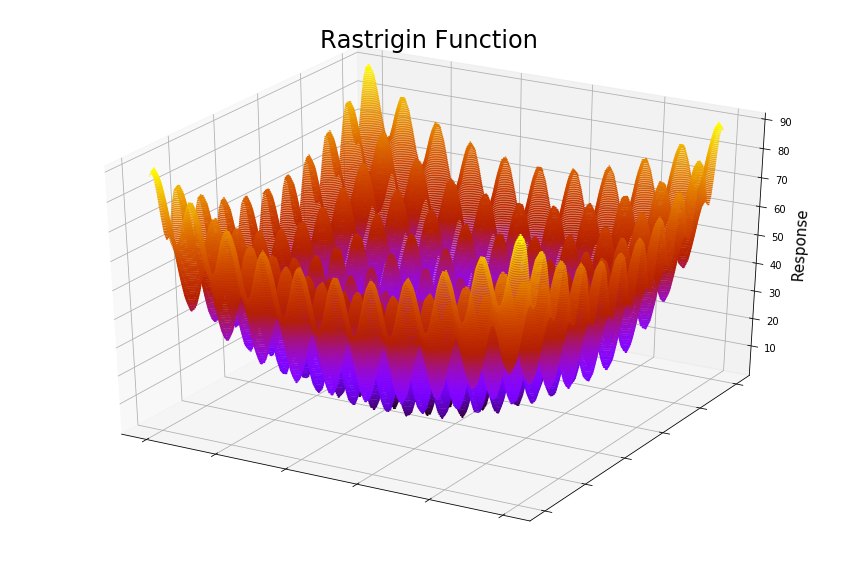

In [7]:
from opt_test_functions import Rastrigin

myTestFunction = Rastrigin()
linsp = np.linspace(0, 1, 100)
x = np.stack(np.meshgrid(linsp, linsp),axis=0)
y = myTestFunction(x)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.contour3D(x[0,:,:], x[1,:,:], y, 150, cmap='gnuplot')
ax.set_zlabel('Response', fontsize=15)
ax.set_title("Rastrigin Function", fontsize=24)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

## Styblinski-Tang
The Styblinski-Tang function is usually evaluated in the hypercube bounded by -5 to 5. The global minimum is where all x<sub>i</sub> = -2.903534.

<div align="center">
	<img width="300" src="images/styblinskitang_function.png" alt="Rastrigin Function">
</div>

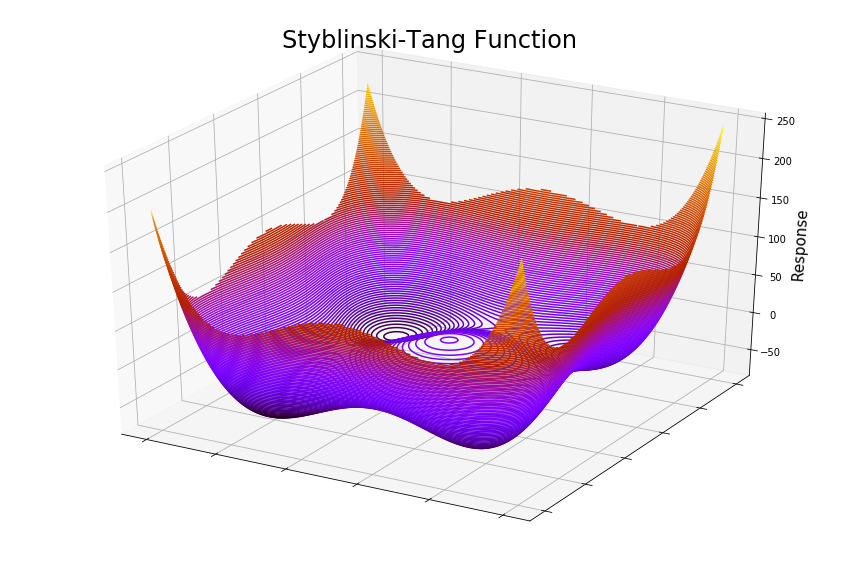

In [8]:
from opt_test_functions import StyblinskiTang

myTestFunction = StyblinskiTang()
linsp = np.linspace(0, 1, 100)
x = np.stack(np.meshgrid(linsp, linsp),axis=0)
y = myTestFunction(x)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.contour3D(x[0,:,:], x[1,:,:], y, 150, cmap='gnuplot')
ax.set_zlabel('Response', fontsize=15)
ax.set_title("Styblinski-Tang Function", fontsize=24)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

## Zakharov
The Zakharov function is usually evaluated in the hypercube bounded by -5 to 10. The global minimum is at the origin, where all x<sub>i</sub> = 0.
<div align="center">
	<img width="300" src="images/zakharov_function.png" alt="Rastrigin Function">
</div>

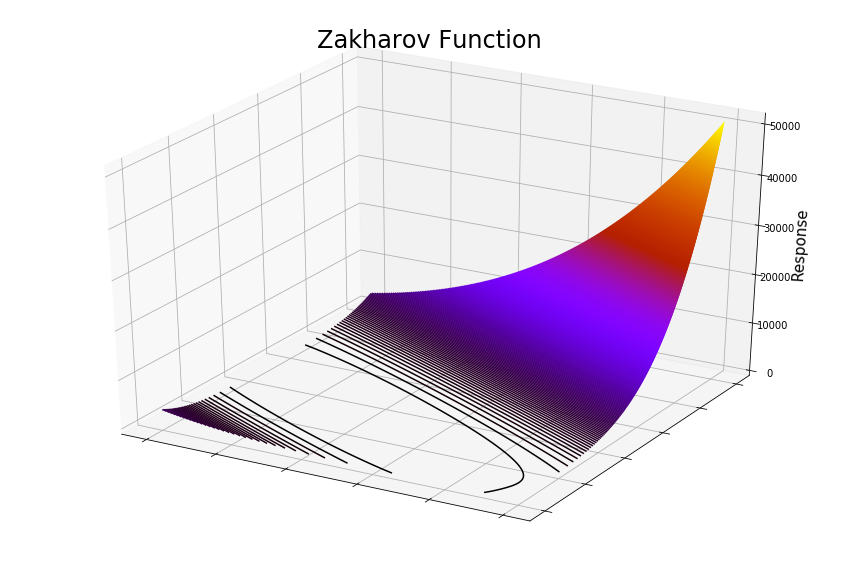

In [9]:
from opt_test_functions import Zakharov

myTestFunction = Zakharov()
linsp = np.linspace(0, 1, 1000)
x = np.stack(np.meshgrid(linsp, linsp),axis=0)
y = myTestFunction(x)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.contour3D(x[0,:,:], x[1,:,:], y, 600, cmap='gnuplot')
ax.set_zlabel('Response', fontsize=15)
ax.set_title("Zakharov Function", fontsize=24)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# References and Further Inspiration
Momin Jamil and Xin-She Yang, A literature survey of benchmark functions forglobal optimization problems,Int.  Journal of Mathematical Modelling andNumerical Optimisation, Vol. 4, No. 2, pp. 150–194 (2013).DOI: 10.1504/IJMMNO.2013.055204, https://arxiv.org/pdf/1308.4008.pdf (Accessed 2020-04-26)

Optimisation test functions implemented in Matlab (Accessed 2020-04-26)
http://www-optima.amp.i.kyoto-u.ac.jp/member/student/hedar/Hedar_files/TestGO_files/Page364.htm